# Runtime Test

In [1]:
from qiskit import IBMQ, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import hellinger_fidelity
from qiskit.ignis.mitigation.expval import expectation_value

In [2]:
# IBMQ.save_account(config('IBM_API_KEY'), overwrite=True)
IBMQ.load_account()
IBMQ.providers()
# provider = IBMQ.get_provider(hub='strangeworks-hub', group='science-team', project='science-test')
provider = IBMQ.get_provider(hub='strangeworks-hub',      group='science-team', project='science-test')
print(provider.backends())

[<IBMQBackend('ibmq_montreal') from IBMQ(hub='strangeworks-hub', group='science-team', project='science-test')>]


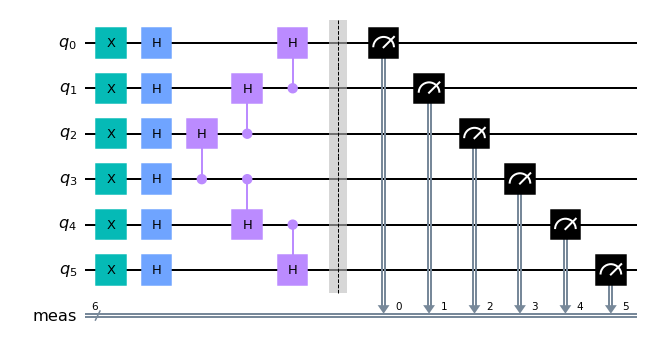

In [3]:
N = 6
qc = QuantumCircuit(N)

qc.x(range(0, N))
qc.h(range(0, N))

for kk in range(N//2,0,-1):
    qc.ch(kk, kk-1)
for kk in range(N//2, N-1):
    qc.ch(kk, kk+1)
qc.measure_all()
qc.draw('mpl',fold=-1)

In [4]:
exact_dist = {'000000': 0.015624999999999986,
              '000001': 0.015624999999999986,
              '000011': 0.031249999999999965,
              '000111': 0.06249999999999992,
              '100000': 0.015624999999999986,
              '100001': 0.015624999999999986,
              '100011': 0.031249999999999965,
              '100111': 0.06249999999999992,
              '110000': 0.031249999999999965,
              '110001': 0.031249999999999965,
              '110011': 0.06249999999999992,
              '110111': 0.12499999999999982,
              '111111': 0.4999999999999991}

In [10]:
backend = provider.get_backend('ibmq_montreal')

In [7]:
print(provider.run_circuits.__doc__)

Execute the input circuit(s) on a backend using the runtime service.

        Note:
            This method uses the IBM Quantum runtime service which is not
            available to all accounts.

        Args:
            circuits: Circuit(s) to execute.

            backend: Backend to execute circuits on.
                Transpiler options are automatically grabbed from backend configuration
                and properties unless otherwise specified.

            initial_layout: Initial position of virtual qubits on physical qubits.

            layout_method: Name of layout selection pass ('trivial', 'dense',
                'noise_adaptive', 'sabre').
                Sometimes a perfect layout can be available in which case the layout_method
                may not run.

            routing_method: Name of routing pass ('basic', 'lookahead', 'stochastic', 'sabre')

            translation_method: Name of translation pass ('unroller', 'translator', 'synthesis')

            seed_tr

In [8]:
job = provider.run_circuits(qc, backend, shots=2048, initial_layout=[0,1,4,7,10,12])

In [11]:
res = job.result()

In [12]:
dir(job)

['_POISON_PILL',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_client',
 '_backend',
 '_creation_date',
 '_empty_result_queue',
 '_executor',
 '_job_id',
 '_params',
 '_program_id',
 '_result_decoder',
 '_result_queue',
 '_results',
 '_start_websocket_client',
 '_status',
 '_stream_results',
 '_streaming',
 '_streaming_loop',
 '_streaming_task',
 '_ws_client',
 'backend',
 'cancel',
 'cancel_result_streaming',
 'creation_date',
 'inputs',
 'job_id',
 'program_id',
 'result',
 'status',
 'stream_results',
 'wait_for_final_state']

In [14]:
job._job_id

'c33sfb0cbvra5jltae70'

In [17]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_experiment',
 '_metadata',
 'backend_name',
 'backend_version',
 'data',
 'date',
 'decode',
 'from_dict',
 'get_counts',
 'get_memory',
 'get_quasiprobabilities',
 'get_statevector',
 'get_unitary',
 'header',
 'job_id',
 'qobj_id',
 'results',
 'status',
 'success',
 'to_dict']

In [20]:
import pprint
pprint.pprint(res.results)

[ExperimentResult(shots=2048, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 26, '0x1': 38, '0x10': 7, '0x11': 7, '0x12': 1, '0x13': 12, '0x17': 19, '0x1b': 1, '0x1e': 2, '0x1f': 46, '0x2': 2, '0x20': 40, '0x21': 42, '0x22': 4, '0x23': 70, '0x24': 2, '0x25': 5, '0x26': 1, '0x27': 120, '0x28': 3, '0x2b': 6, '0x2d': 2, '0x2f': 17, '0x3': 59, '0x30': 76, '0x31': 68, '0x32': 2, '0x33': 136, '0x34': 1, '0x35': 9, '0x36': 5, '0x37': 302, '0x38': 4, '0x39': 5, '0x3b': 18, '0x3c': 1, '0x3d': 28, '0x3e': 20, '0x3f': 693, '0x4': 1, '0x5': 1, '0x6': 4, '0x7': 127, '0x8': 2, '0x9': 1, '0xb': 1, '0xd': 1, '0xf': 10}), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1], ['meas', 2], ['meas', 3], ['meas', 4], ['meas', 5]], creg_sizes=[['meas', 6]], global_phase=3.9269908169872467, memory_slots=6, metadata={}, n_qubits=27, name='circuit-2', qreg_sizes=[['q', 27]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8